# Load Basic Libraries


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the csv file


In [2]:
df = pd.read_csv('heart.csv')


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Exploring the data set in order to derive useful information

In [4]:
df.shape


(1025, 14)

# this shows our data has 1025 rows and 14 columns



In [5]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# we can see the column names here



In [6]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Statstical Details Describe provides us with statistical information in the numerical format. we can infer that in the AGE column the minimum age is 29yrs and maximium is 77yrs mean of age is 54yrs. The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles or 4 equal parts. so 25% values lie in each group. standard deviation and mean are statistical measures which give us an idea of the central tendency of the data set. However , mean is effected by outliers and hence we need more information to make accurate decisions.



In [76]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [77]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 112.2 KB
None


# we notice that the dataset has no null values. this saved us from conveting the null values into some data or dropping then altogether.



# Finding the correlation among the attributes


<Axes: >

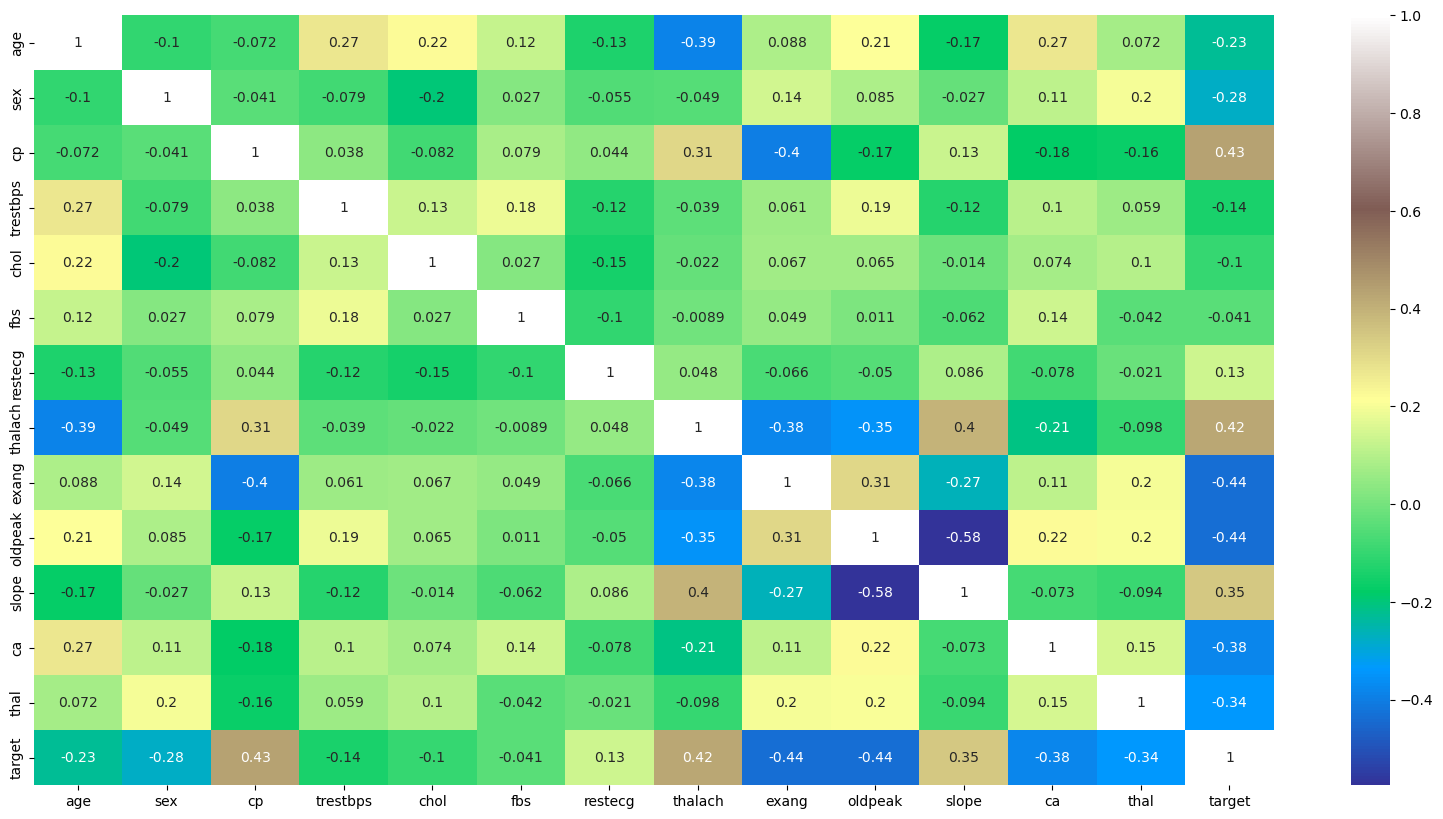

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

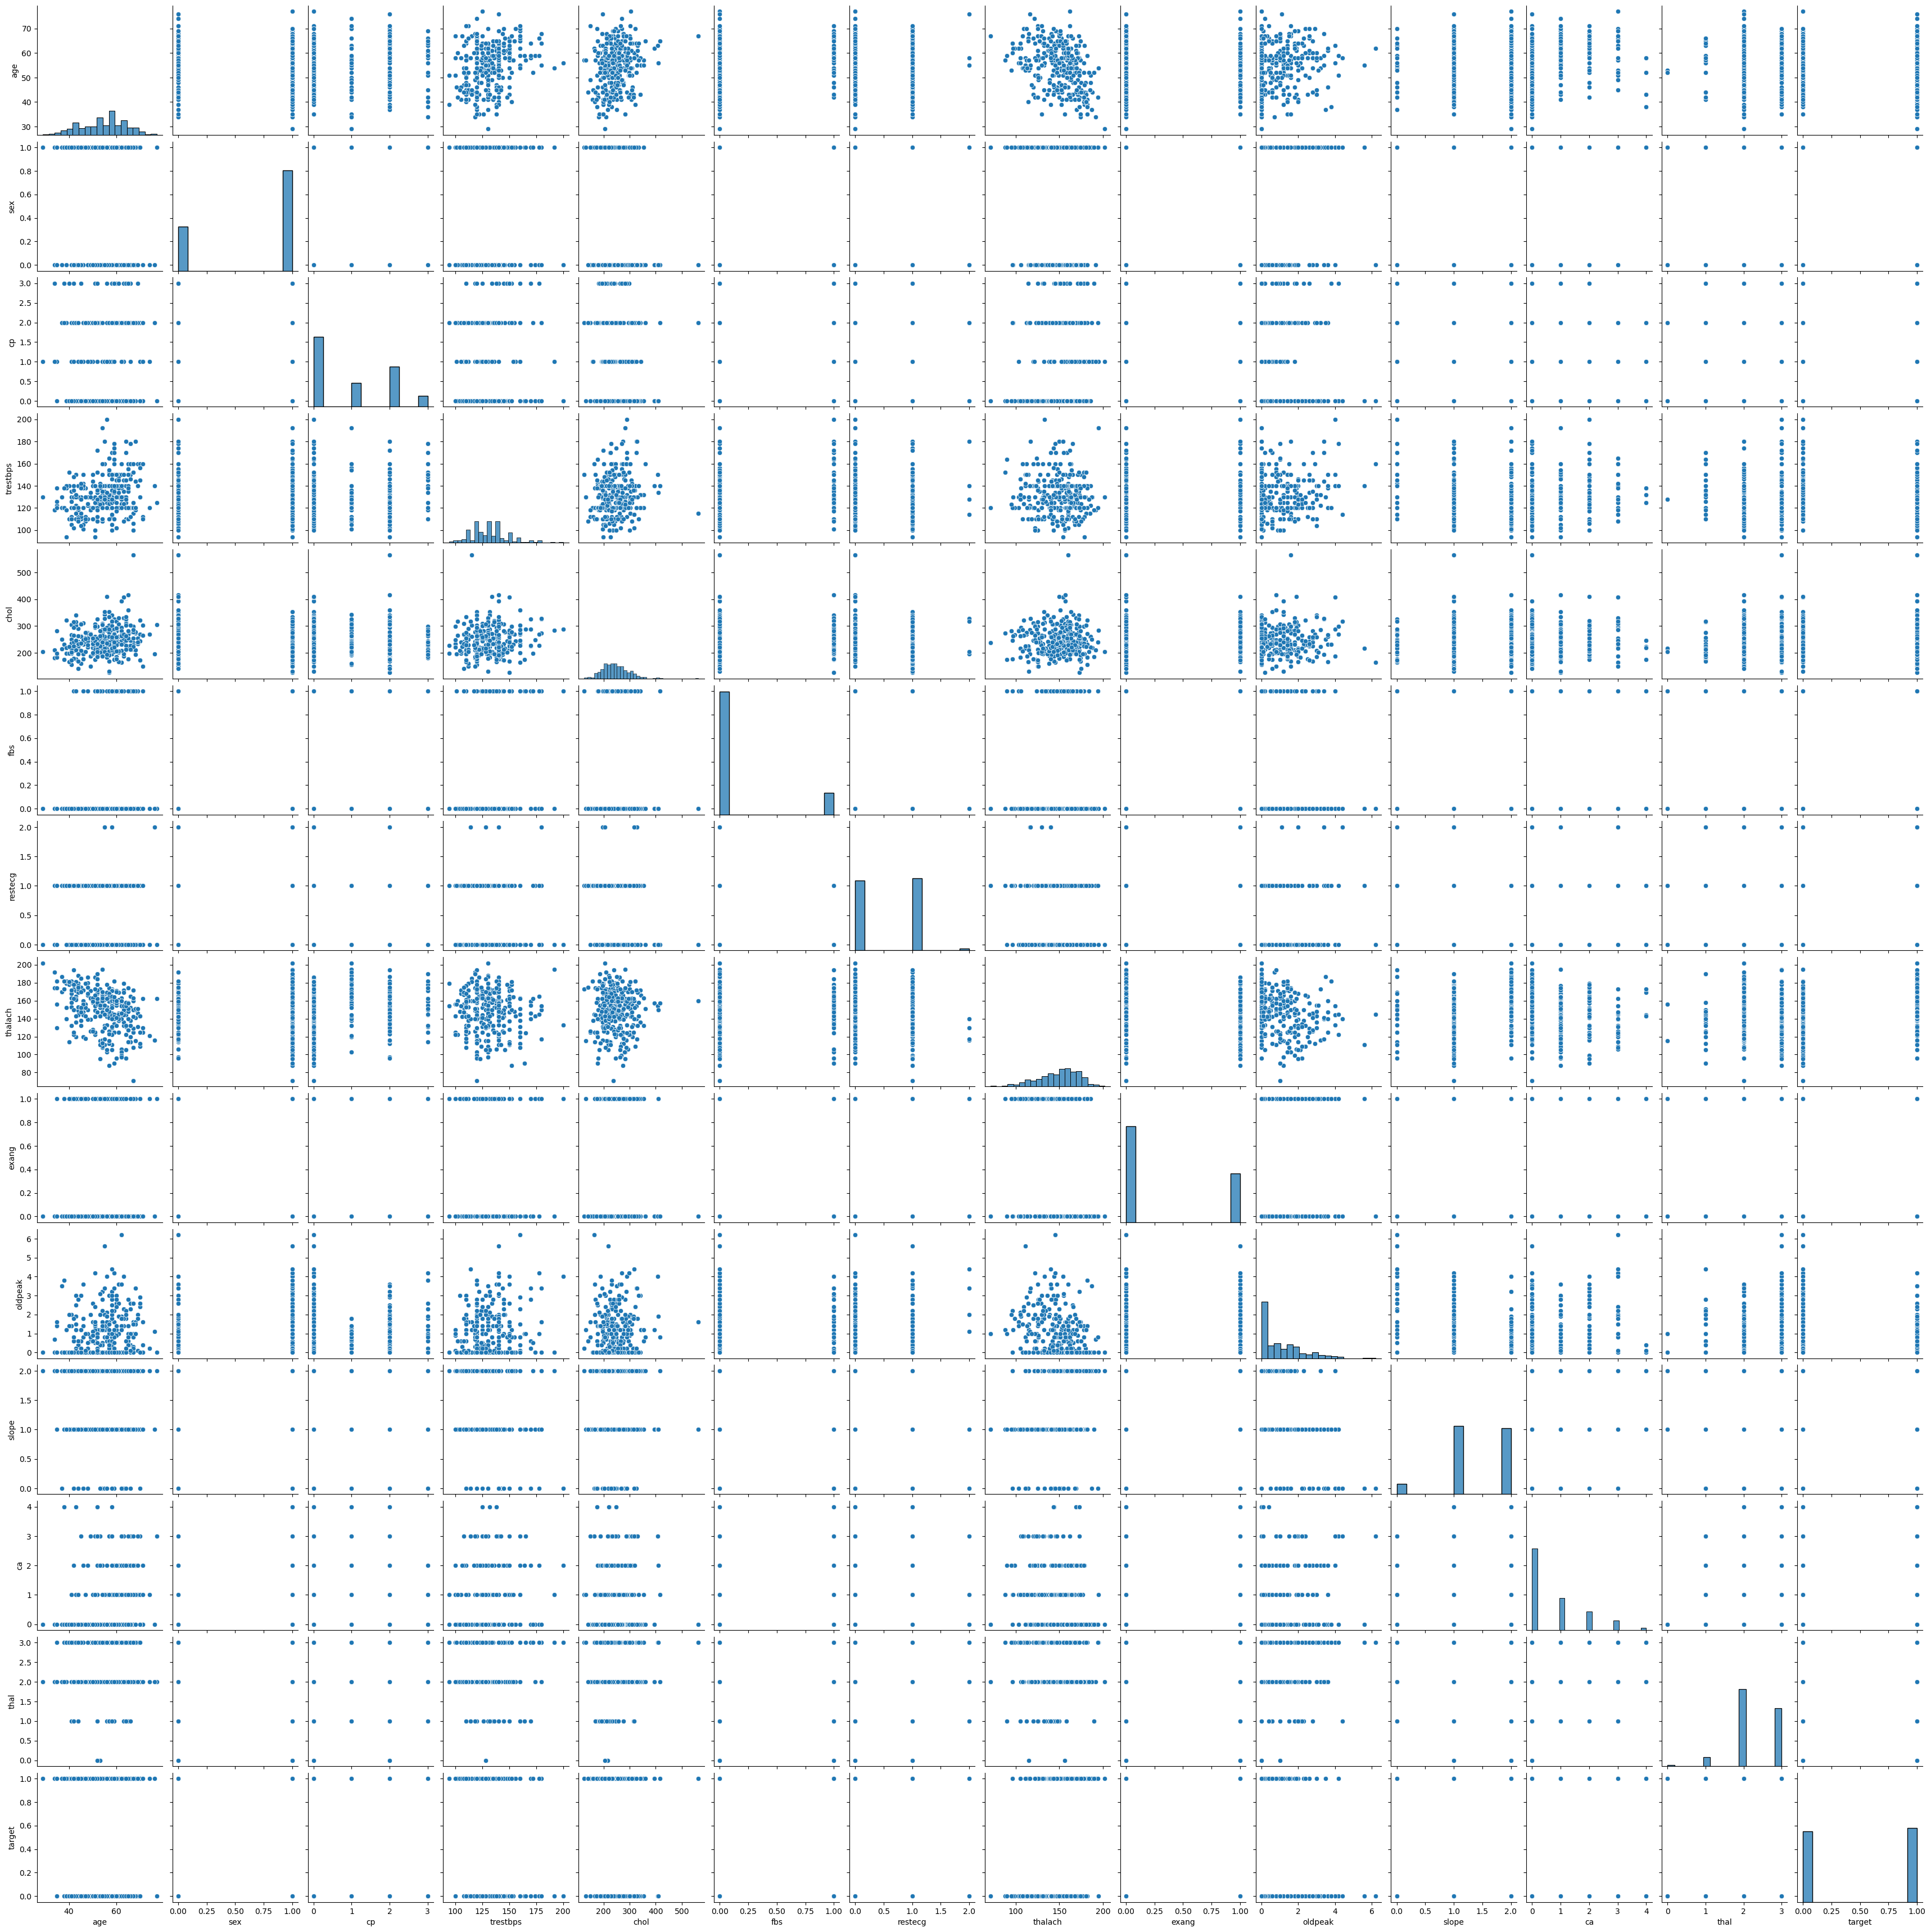

In [11]:
sns.pairplot(data=df)


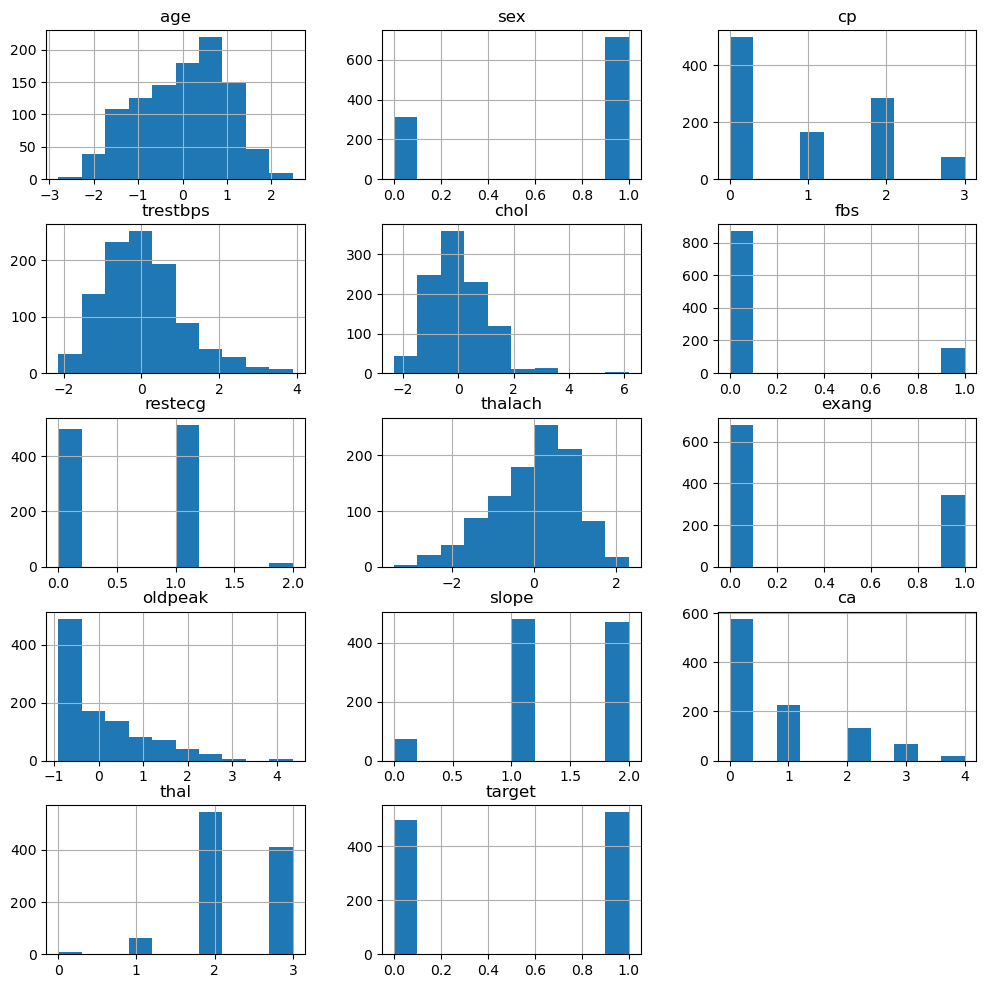

In [78]:
# box and whiskers plot
df.hist(figsize=(12,12), layout=(5,3));


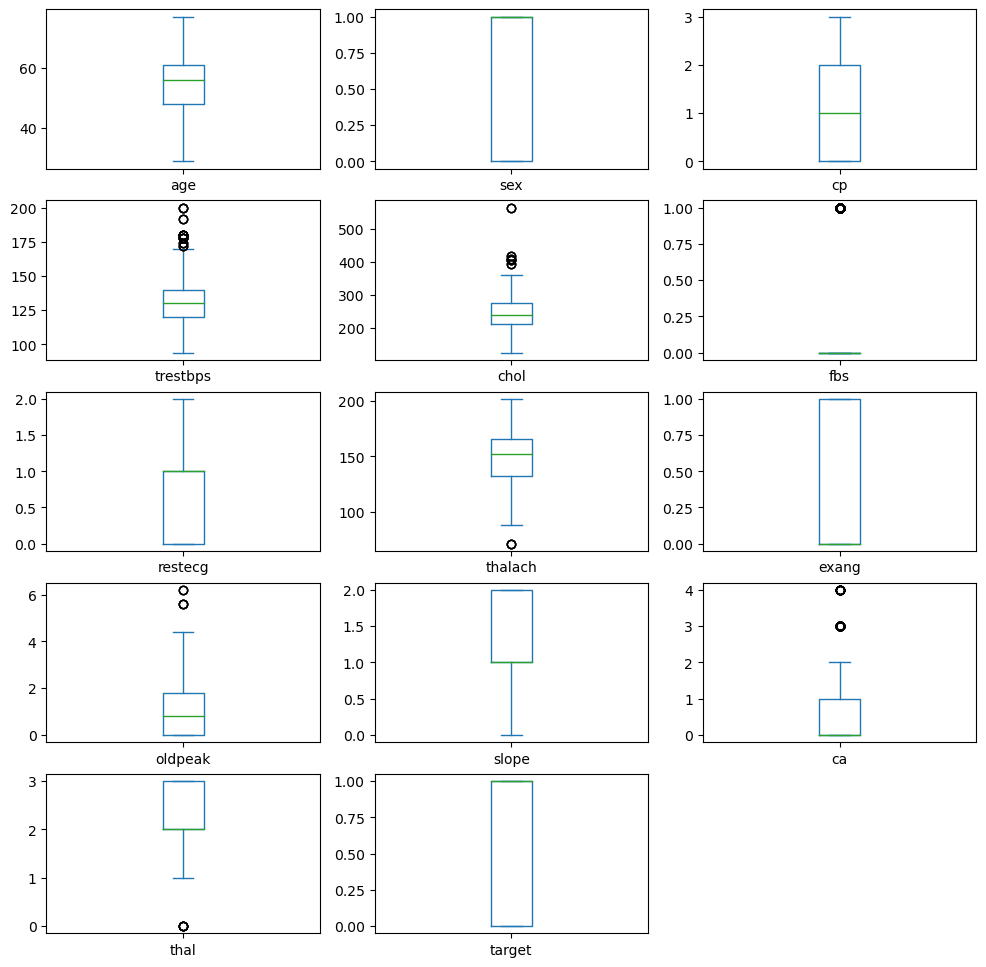

In [13]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

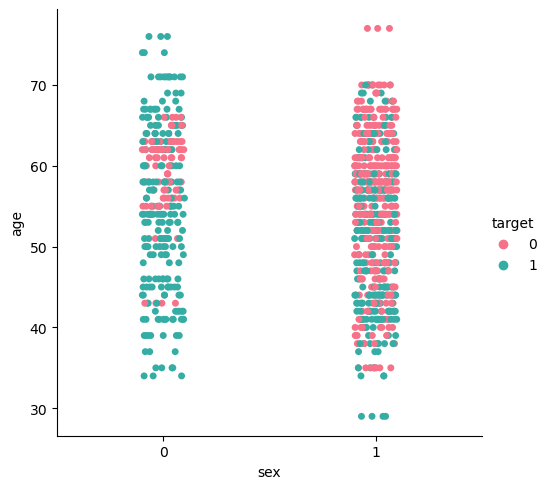

In [14]:
sns.catplot(data=df, x='sex', y='age',  hue='target', palette='husl')


<Axes: xlabel='sex', ylabel='chol'>

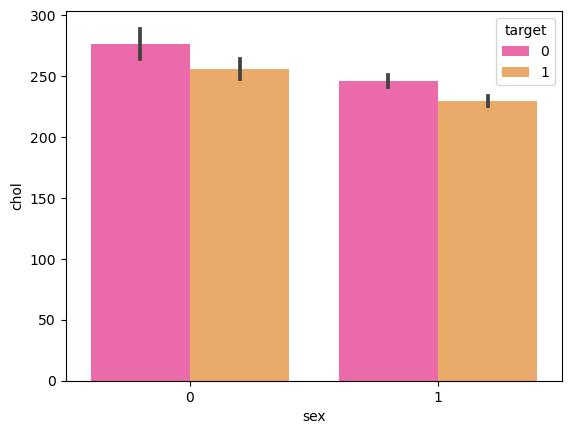

In [15]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')


In [16]:
df['sex'].value_counts()


1    713
0    312
Name: sex, dtype: int64

# 713 males and 312 females


In [79]:
df['target'].value_counts()


1    526
0    499
Name: target, dtype: int64

# 526 cases of heart diseases
# and 138 cases of no heart diseases



In [18]:
df['thal'].value_counts()


2    544
3    410
1     64
0      7
Name: thal, dtype: int64

# results of thallium stress test measuring blood flow to the heart,
# with possible values normal, fixed_defect, reversible_defect

<Axes: xlabel='sex', ylabel='count'>

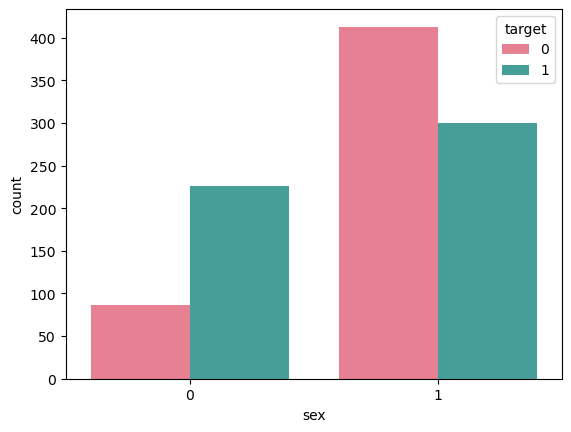

In [19]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')


# Here 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

<Axes: xlabel='target', ylabel='count'>

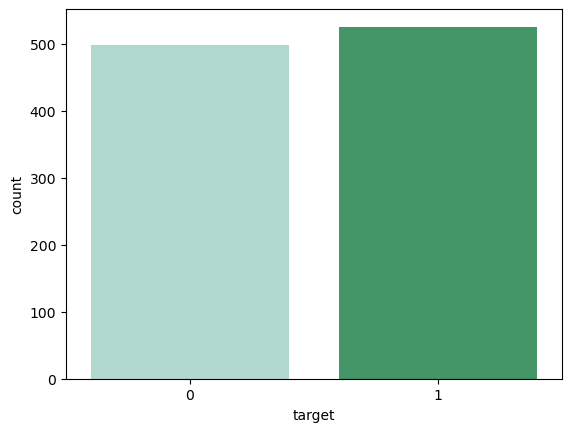

In [20]:
sns.countplot(x='target',palette='BuGn', data=df)


# we observe the count for not having heart disease and having heart disease are almost balanced not having frequency count is 490 and those having heart disease the count is 500.



<Axes: xlabel='ca', ylabel='count'>

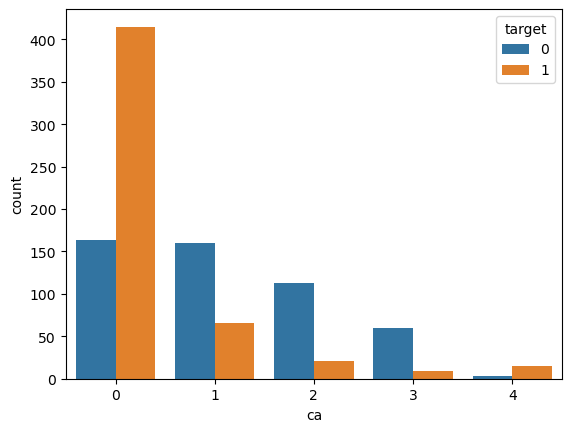

In [21]:
sns.countplot(x='ca',hue='target',data=df)


# ca : number of major vessels (0-3) colored by flourosopy


In [22]:
df['ca'].value_counts()



0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

# ca number of major vessels (0-3) colored by flourosopy ca has a negative corelation with the target i.e when ca will increase we witness a drop in heart diseases and vice versa.



<Axes: xlabel='thal', ylabel='count'>

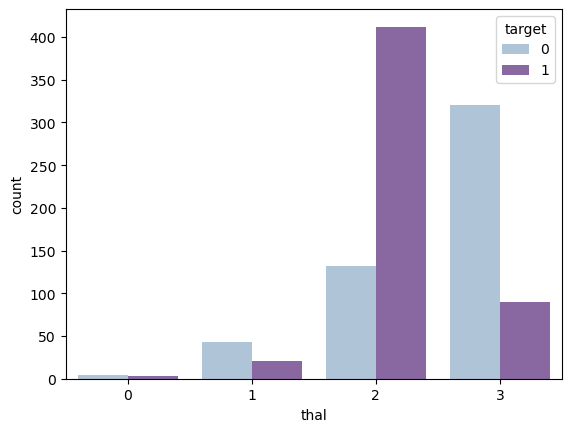

In [23]:
sns.countplot(x='thal',data=df, hue='target', palette='BuPu' )


# thal3 = normal; 6 = fixed defect; 7 = reversable defect



<Axes: xlabel='thal', ylabel='count'>

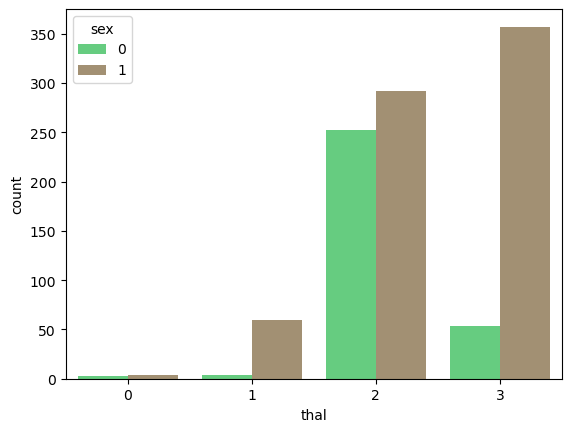

In [24]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')


In [25]:
df['cp'].value_counts()  # chest pain type


0    497
2    284
1    167
3     77
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

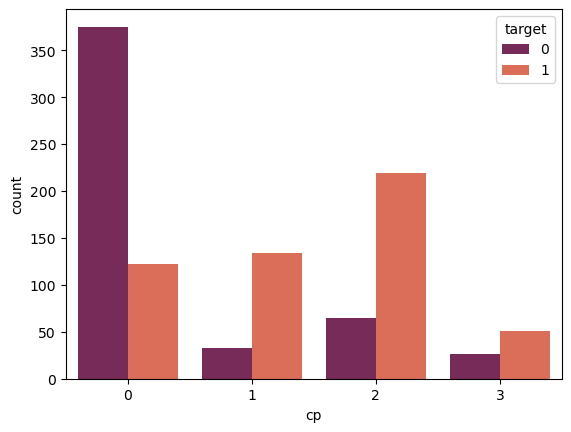

In [26]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')


# shows chest pain with respect to heart disease/ target

<Axes: xlabel='cp', ylabel='count'>

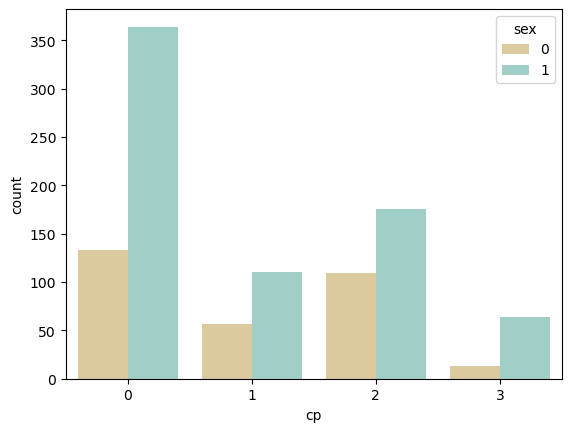

In [27]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')


# this shows chest pain count experienced by male and female



<Axes: xlabel='sex', ylabel='chol'>

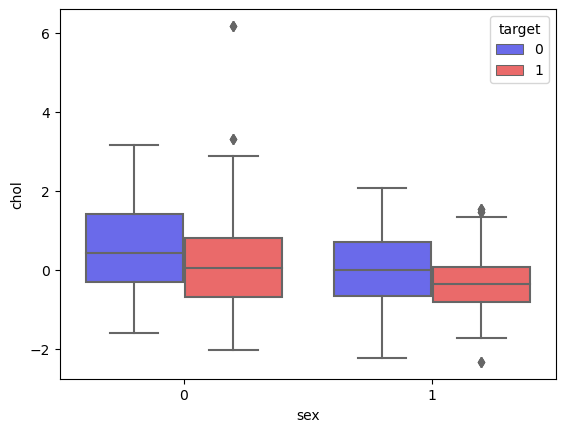

In [80]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)


# we observe the outliers with the help of boxplot. outliers are values that are very small or large in the given data set.



<Axes: xlabel='sex', ylabel='cp'>

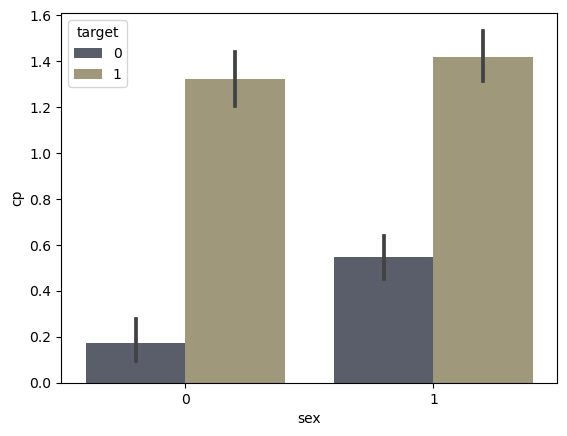

In [29]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')


<Axes: xlabel='sex', ylabel='thal'>

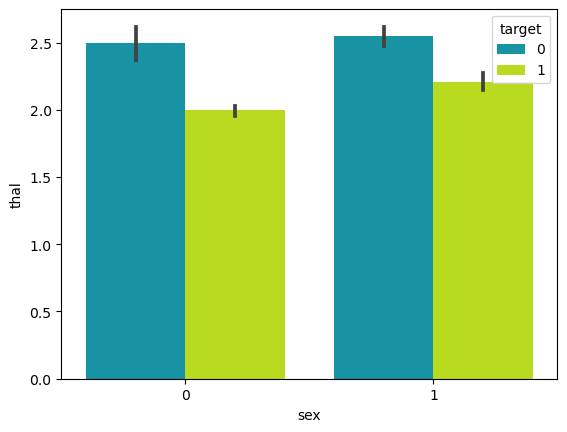

In [30]:
sns.barplot(x='sex', y='thal', data=df, hue='target', palette='nipy_spectral')


<Axes: xlabel='target', ylabel='ca'>

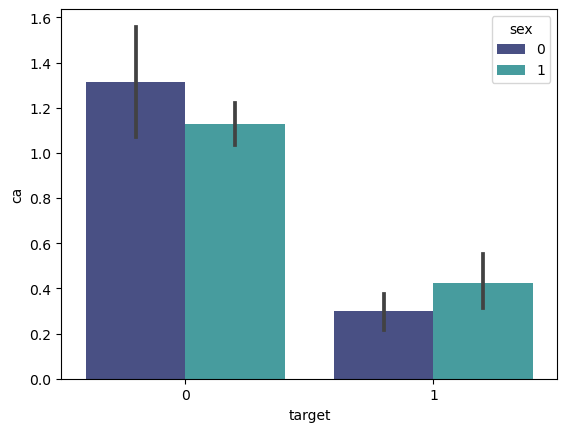

In [31]:
sns.barplot(x='target', y='ca', hue='sex', data=df, palette='mako')


<Axes: xlabel='sex', ylabel='oldpeak'>

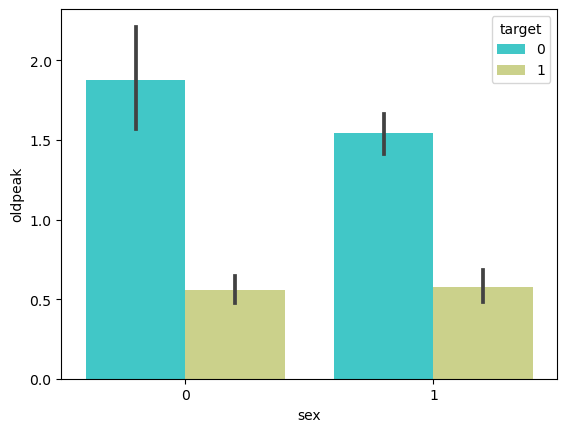

In [32]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df)


# ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms


# fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation


In [33]:
df['fbs'].value_counts()


0    872
1    153
Name: fbs, dtype: int64

<Axes: xlabel='fbs', ylabel='chol'>

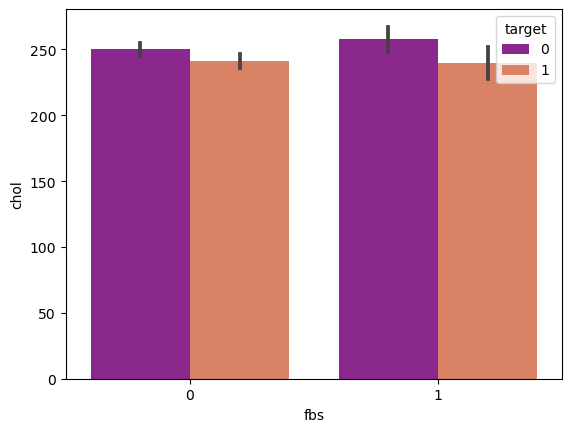

In [34]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )


<Axes: xlabel='sex', ylabel='target'>

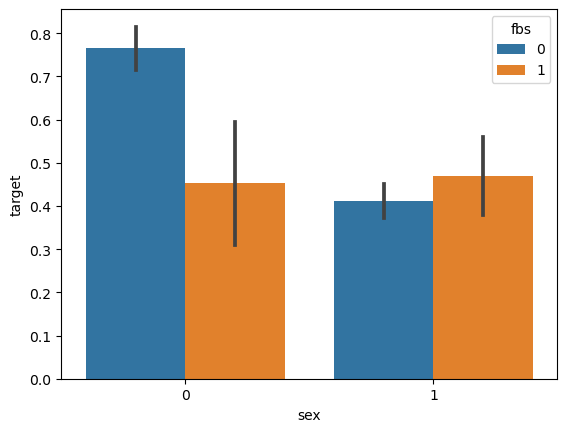

In [81]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)


# Cross Tables


In [36]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)


target    0    1
sex             
0        86  226
1       413  300


<Axes: xlabel='sex'>

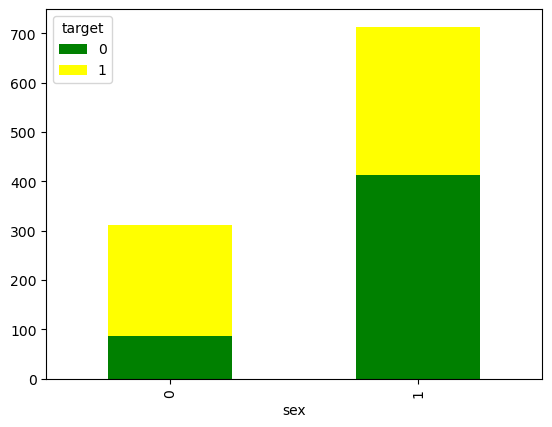

In [37]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)


In [38]:

temp=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
temp


thal,0,1,2,3,All
sex,,,,,
0,3,4,252,53,312
1,4,60,292,357,713
All,7,64,544,410,1025


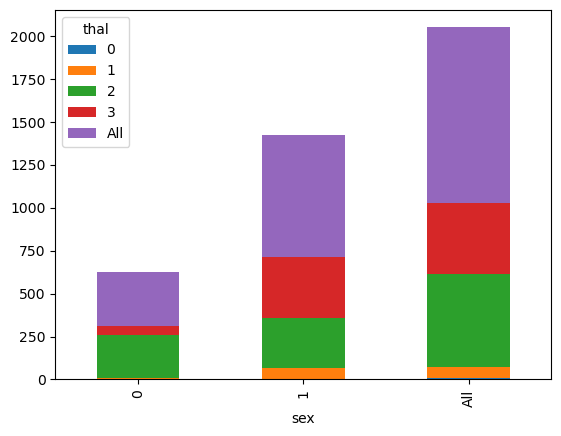

In [39]:

temp.plot(kind="bar",stacked=True)
plt.show()

In [40]:

temp=pd.crosstab(index=df['target'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
target,,,,,
0,4,43,132,320,499
1,3,21,412,90,526
All,7,64,544,410,1025


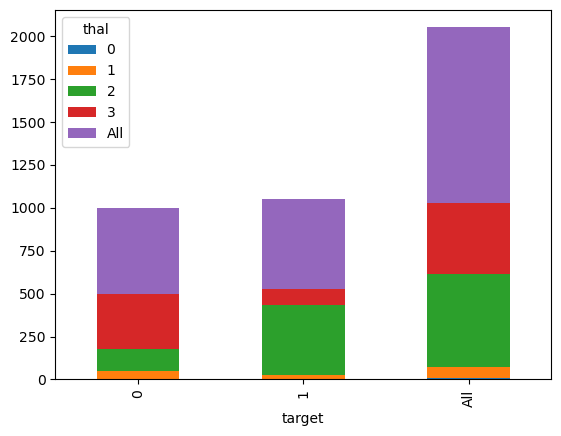

In [41]:

temp.plot(kind='bar', stacked=True)
plt.show()


In [42]:

chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


<Axes: xlabel='cp'>

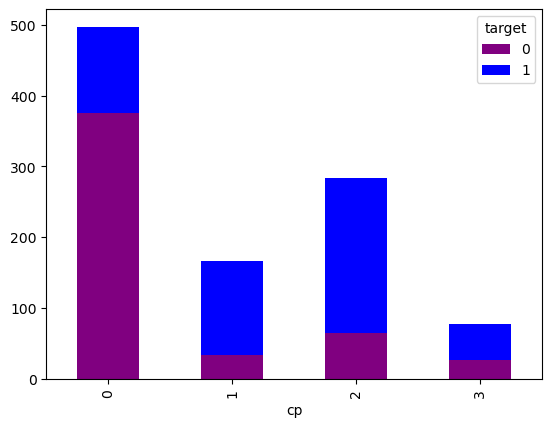

In [43]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

# KEEP PRACTICING AND ENJOY THE PROCESS

Preparing the data for Model

Scaling the data


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])


In [45]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [47]:
X= df.drop(['target'], axis=1)
y= df['target']

In [48]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)


# Check the sample Size


In [49]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 9321
X_test- 4004
y_train- 717
y_test- 308


# Logistic Regression


In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[115,  38],
       [ 19, 136]], dtype=int64)

<Axes: >

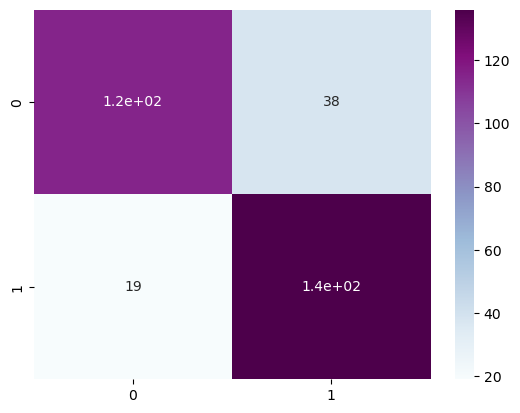

In [52]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [53]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.814935064935065


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.814935064935065

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       153
           1       0.78      0.88      0.83       155

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



# Decision Tree


In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [57]:
cm2

array([[153,   0],
       [  3, 152]], dtype=int64)

In [59]:

accuracy_score(y_test,prediction2)



0.9902597402597403

In [60]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       153
           1       1.00      0.98      0.99       155

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



# Random Forest


In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[153,   0],
       [  3, 152]], dtype=int64)

In [62]:
accuracy_score(y_test, prediction3)


0.9902597402597403

In [63]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       153
           1       1.00      0.98      0.99       155

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



# Support Vector Machine

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
from sklearn.svm import SVC
svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)

In [67]:
cm4


array([[125,  28],
       [ 10, 145]], dtype=int64)

In [68]:
accuracy_score(y_test, prediction4)

0.8766233766233766

#  GaussianNB

In [69]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(y_test, prediction5)

In [70]:

cm5

array([[114,  39],
       [ 21, 134]], dtype=int64)

In [71]:
accuracy_score(y_test, prediction5)

0.8051948051948052

In [72]:
print('cm4', cm4)
print('-----------')
print('cm5',cm5)

cm4 [[125  28]
 [ 10 145]]
-----------
cm5 [[114  39]
 [ 21 134]]


# KNeighbor

In [73]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6= confusion_matrix(y_test, prediction5)
cm6

array([[114,  39],
       [ 21, 134]], dtype=int64)

# Best accuracy is given by Decision Tree : 99

# followed by  Random Forest : 99
